
## **Stage 4  EDA 기반 시각화 및 가공 - <font color="blue">WHERE</font>  어디서 연체 정도가 잘 나타날까?**
<img src='http://drive.google.com/uc?export=view&id=1h6SRzLLU8X50E7srv6IhyoWlJXPB-lax' /><br>


## **INTRO**
지난 스테이지 **Stage 3.	기초 EDA 및 분석 - <font color="blue">WHAT</font> 무엇이 연체 정도에 영향을 줄까?**에서 변수들의 추론적 통계를 확인하고, AutoML로 모델링해보았습니다 😀  

예측을 잘하려면 어떤 것이 중요할까요? 바로 예측에 사용하는 변수를 잘 파악하는 것입니다!

다양한 **변수별 특징을 시각화**하면, **특징을 쉽게 파악하고 새로운 인사이트를 도출**하기 수월합니다  😎


이번 스테이지는 **변수들의 특징과 예측값과의 관계를 시각화**하고, **데이터 전처리 작업을 수행**할 예정입니다.

그럼, 변수와 예측값과의 연관성을 발견할 준비가 되셨을까요? 바로 시작하겠습니다!

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브를 사용하는 경우

PATH = "/content/drive/MyDrive/데이크루6기_보초석분/data/"

train = pd.read_csv(PATH+'train.csv') # pd.read_csv(PATH) -> PATH에 로컬 저장 경로 입력 ex) C:/home/data/train.csv
test = pd.read_csv(PATH+'test.csv')
submission = pd.read_csv(PATH+'sample_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. 변수별 특징 및 예측값과의 관계 시각화**

#### 1-1. 연속형 변수 특징

필요한 라이브러리를 불러오고, 연속형 변수의 분포를 시각화해봅시다!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
cont_col = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']

In [ ]:
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']] = -train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']] = -test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,13899,4709,6.0
1,11380,1540,5.0
2,19087,4434,22.0
3,15088,2092,37.0
4,15037,2105,26.0


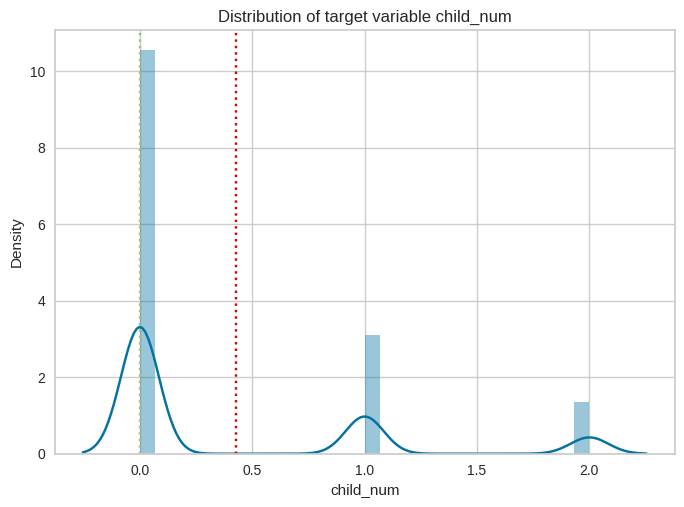

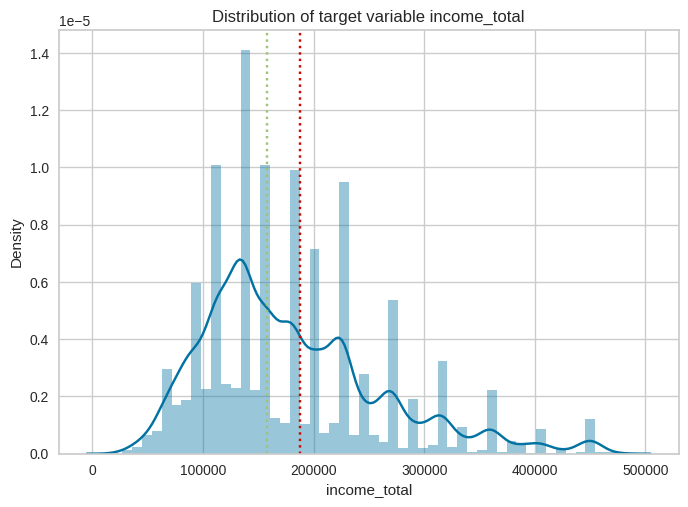

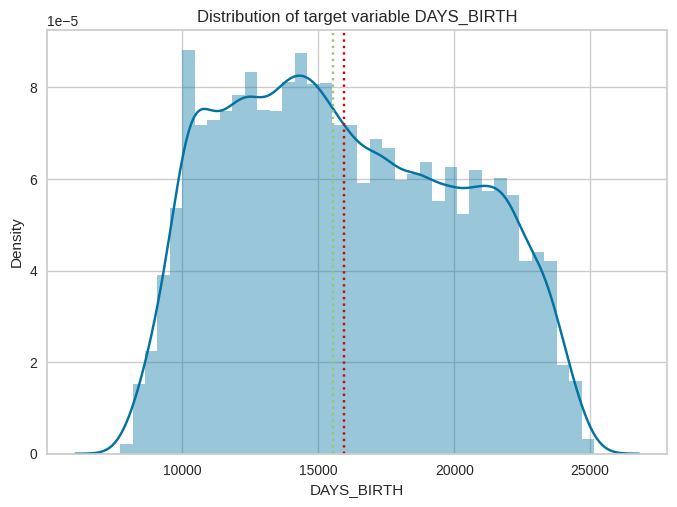

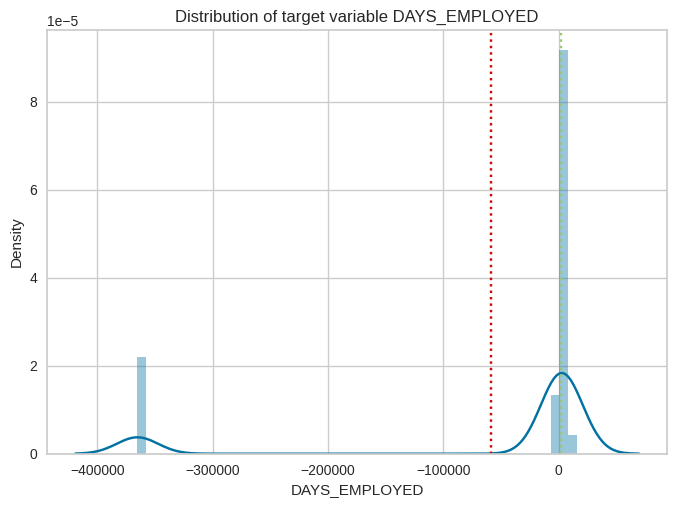

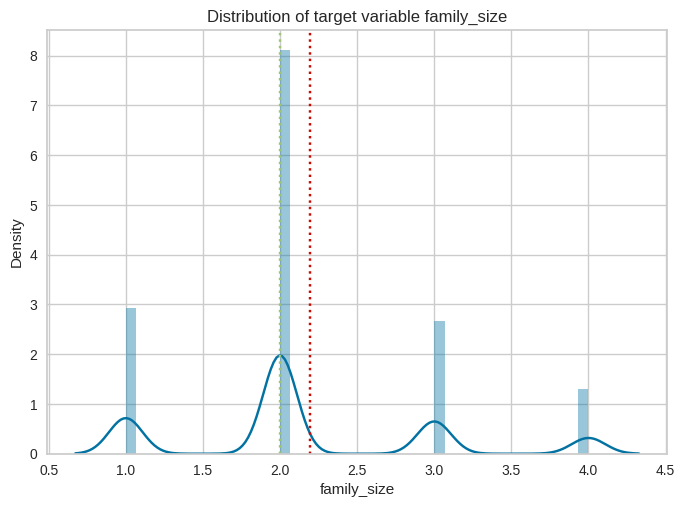

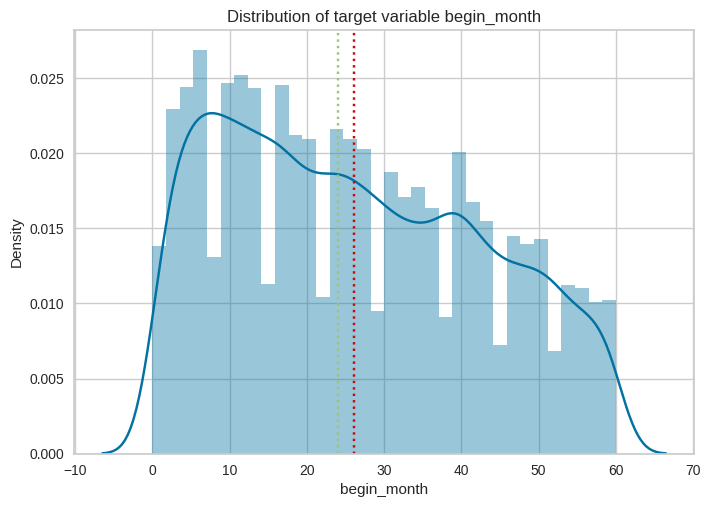

In [ ]:
for c in cont_col:
    mean = np.mean(train[c])
    std = np.sqrt(np.var(train[c]))

    sns.distplot((train[train[c] <=mean+3*std][c])) # 3-sigma
    plt.title(f'Distribution of target variable '+c)
    plt.axvline(x=mean, color='r', linestyle=':')
    plt.axvline(x=np.median(train[c]), color='g', linestyle=':')
    plt.show()

각 그래프에는 붉은색 점선으로 평균값과 초록색 점선으로 중앙값이 표시되어 있습니다.

- child_num: 대부분의 사람들이 자녀가 없거나 1명인 것으로 보입니다. 이 분포는 오른쪽으로 왜곡되어 있습니다.
- income_total: 소득 분포는 오른쪽으로 왜곡되어 있으며, 대부분의 사람들의 소득이 낮은 편입니다.
- DAYS_BIRTH: 대부분의 사람들의 나이는 20대 중반에서 60대 중반 사이입니다. 분포는 상대적으로 균일합니다.
- DAYS_EMPLOYED: 많은 사람들이 일하지 않고 있음을 나타내는 값이 있습니다. 나머지 사람들에 대한 고용 기간은 0에서 약 12,000일(약 33년) 사이입니다.
- family_size: 대부분의 사람들이 1~2명의 가족 구성원을 가지고 있습니다. 가족 크기의 분포는 오른쪽으로 왜곡되어 있습니다.
- begin_month: 신용카드 발급 이후 경과한 기간의 분포는 균일하게 나타나고 있습니다.


#### 1-2. 범주형 변수 특징

범주형 변수의 특징을 시각화해봅시다!

In [ ]:
# Define categorical features
categorical_features = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type']

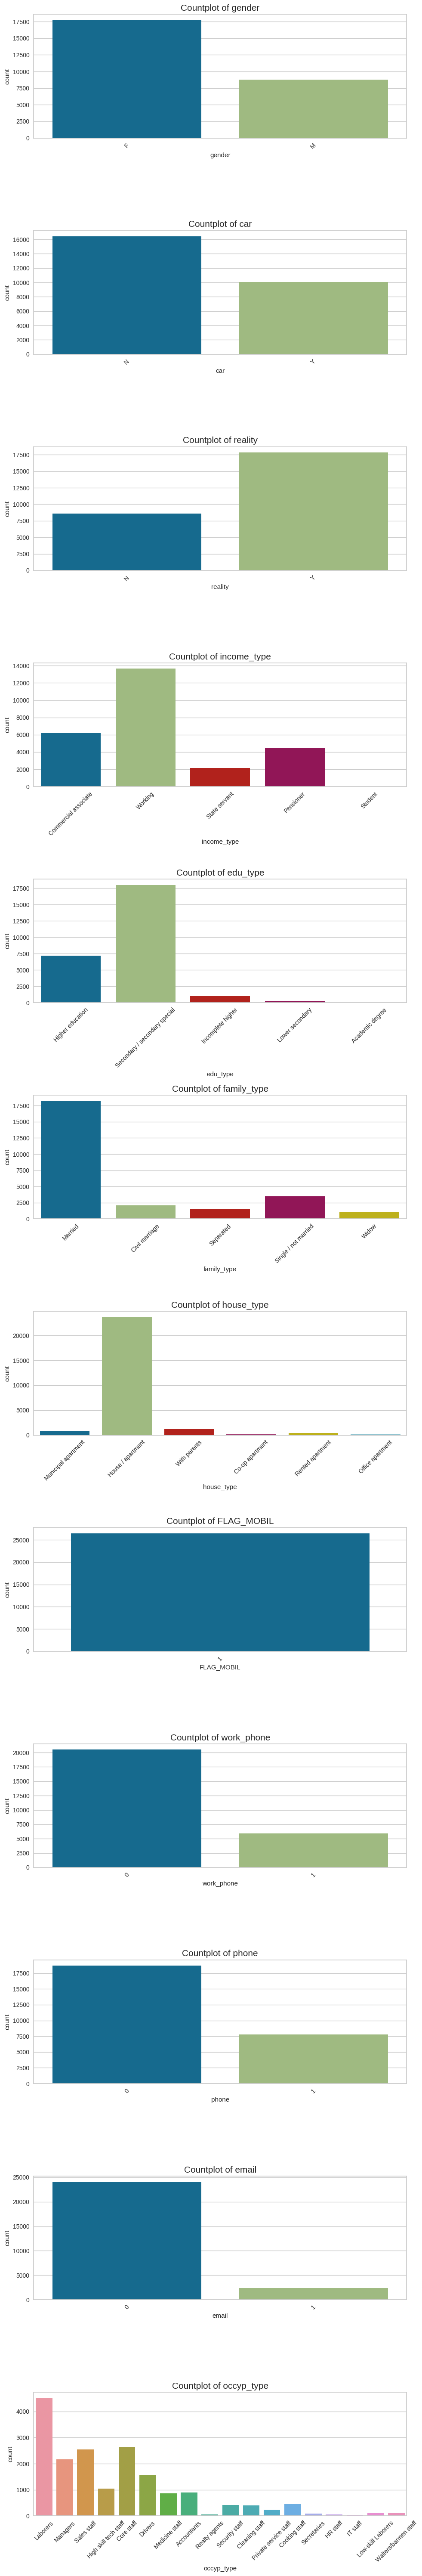

In [ ]:
# Create subplots
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, len(categorical_features)*5))

# Generate bar plots for each categorical feature
for ax, feature in zip(axes, categorical_features):
    sns.countplot(data=train, x=feature, ax=ax)
    ax.set_title(f'Countplot of {feature}', fontsize=15)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- 성별: 이 데이터셋에서는 여성의 수가 남성보다 많습니다.
- 자동차 소유 여부: 이 데이터셋의 대부분의 사람들은 자동차를 소유하고 있지 않습니다.
- 부동산 소유 여부: 이 데이터셋의 대부분의 사람들은 부동산을 소유하고 있습니다.
- 소득 유형: 이 데이터셋의 대부분의 사람들은 일하는 사람이거나 상업적인 파트너입니다.
- 교육 수준: 이 데이터셋의 대부분의 사람들은 중등 교육을 받았습니다.
- 가족 형태: 이 데이터셋의 대부분의 사람들은 결혼하였습니다.
- 주택 유형: 이 데이터셋의 대부분의 사람들은 아파트에 살고 있습니다.
- 휴대폰 소유 여부: 이 데이터셋의 모든 사람들이 휴대폰을 소유하고 있습니다.
- 직장 전화 소유 여부: 이 데이터셋의 대부분의 사람들은 직장 전화를 가지고 있지 않습니다.
- 전화 소유 여부: 이 데이터셋의 대부분의 사람들은 전화를 가지고 있지 않습니다.
- 이메일 소유 여부: 이 데이터셋의 대부분의 사람들은 이메일을 가지고 있지 않습니다.
- 직업 유형: 이 데이터셋에서 직업 유형이 제공된 사람들 중에는 다양한 직업들이 있지만, "Laborers", "Sales staff", "Core staff"가 가장 흔합니다. 그러나 이 열에는 많은 누락된 값들이 있습니다.



#### 1-3. 예측값과의 관계 시각화
상관관계 히트맵와 상자 그림으로 예측값과 변수의 관계를 확인해봅니다.

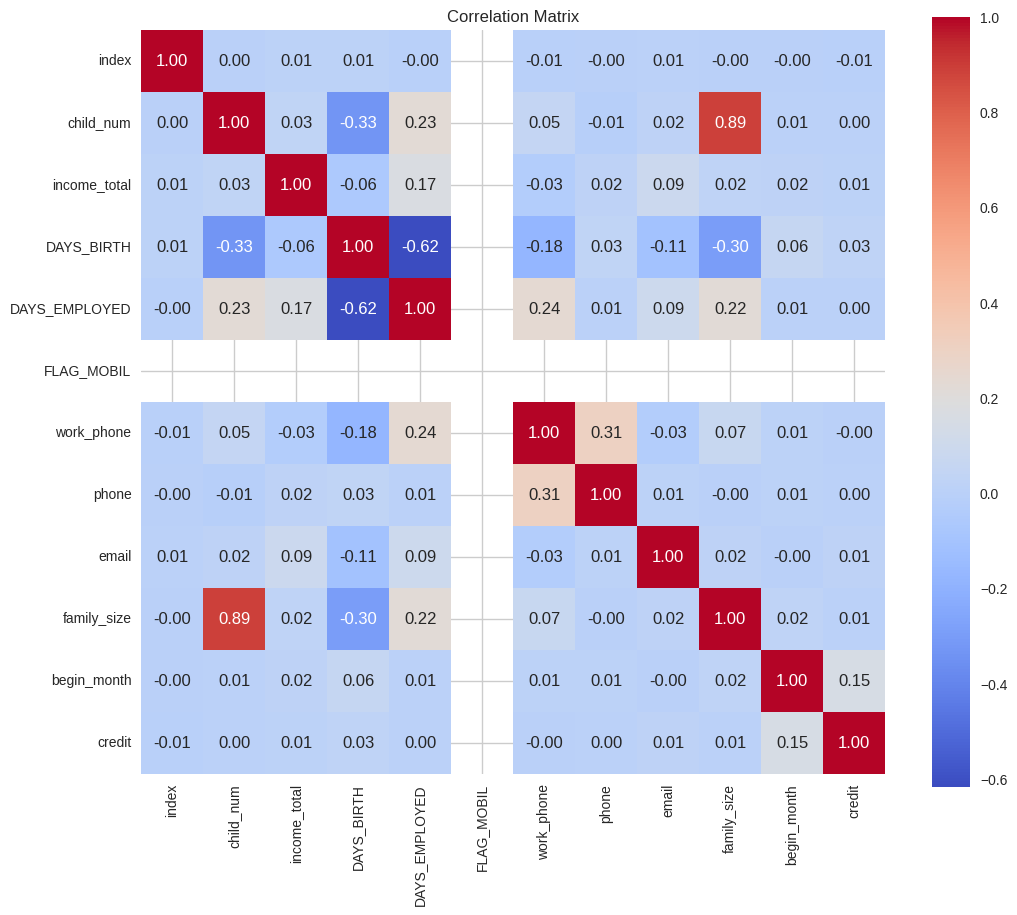

In [ ]:
# Calculate the correlation matrix
corr_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

위 히트맵에서는 변수 간의 상관 관계를 시각적으로 확인할 수 있습니다. 몇 가지 주요 포인트를 살펴보겠습니다.

- **양의 상관 관계**:
   - `family_size`와 `child_num`은 약 0.89의 상관 계수를 가지며, 이는 두 변수가 강한 양의 상관 관계를 가진다는 것을 의미합니다. 즉, 자녀의 수가 많을수록 가족 규모도 커집니다.

- **음의 상관 관계**:
   - `DAYS_BIRTH`와 `Age`는 -1의 상관 계수를 가지고 있습니다. 이는 `Age` 변수가 `DAYS_BIRTH` 변수의 음수 변환으로 생성되었기 때문입니다.
   - `begin_month`와 `credit` 간에는 약 -0.15의 상관 계수가 있습니다. 이는 약한 음의 상관 관계를 나타내며, 이는 신용카드 발급일이 오래될수록 신용도 점수가 약간 높아질 수 있음을 의미할 수 있습니다.

- **저 상관 관계**:
   - 대부분의 변수들은 서로 약한 상관 관계를 가지고 있습니다. 즉, 이 변수들은 서로 크게 영향을 주지 않습니다.

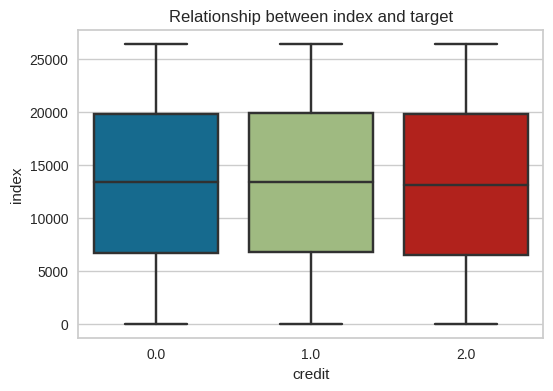

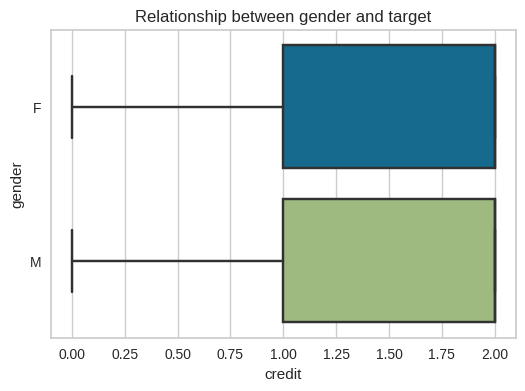

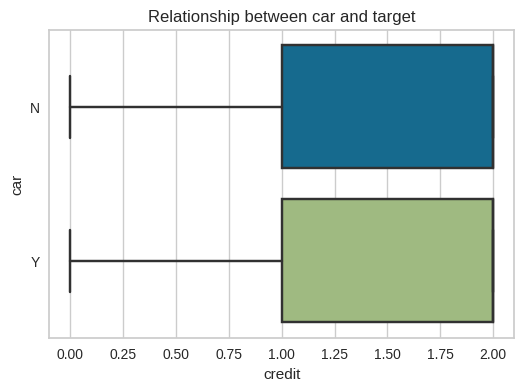

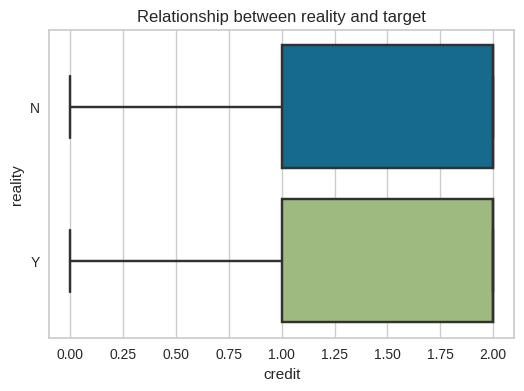

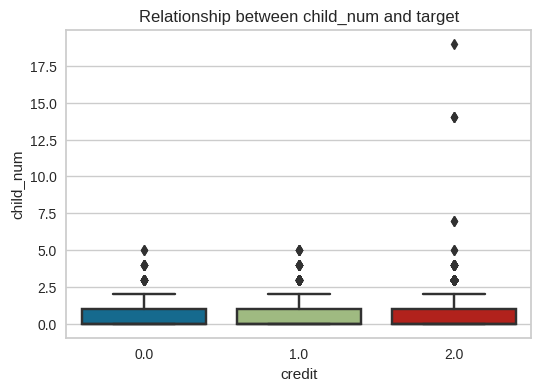

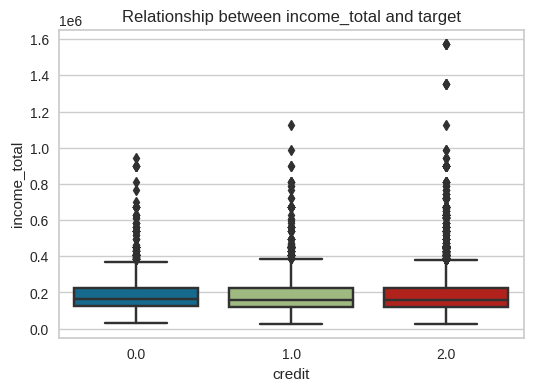

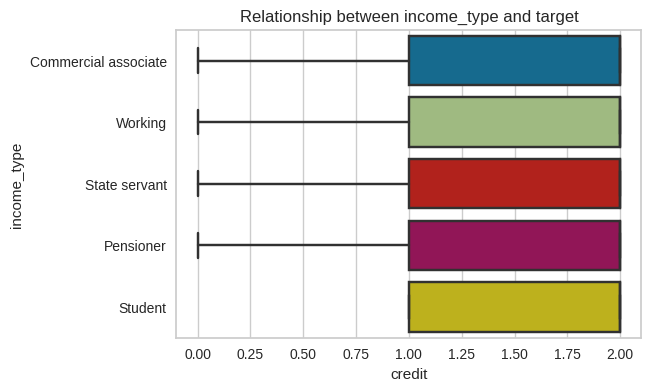

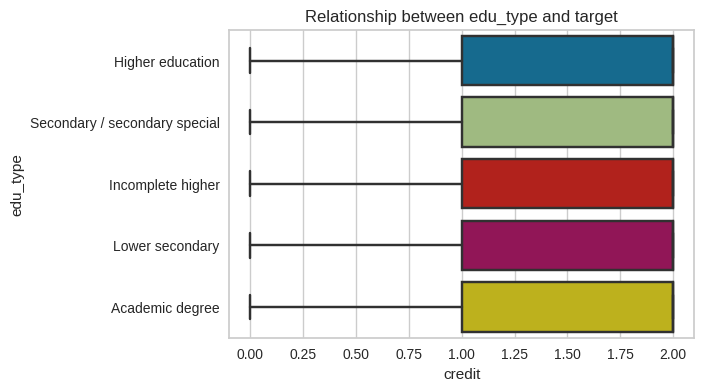

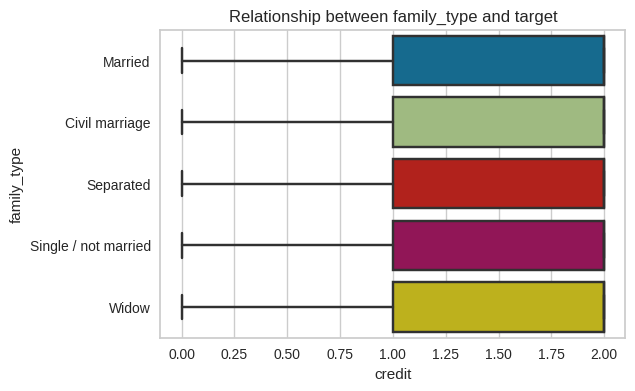

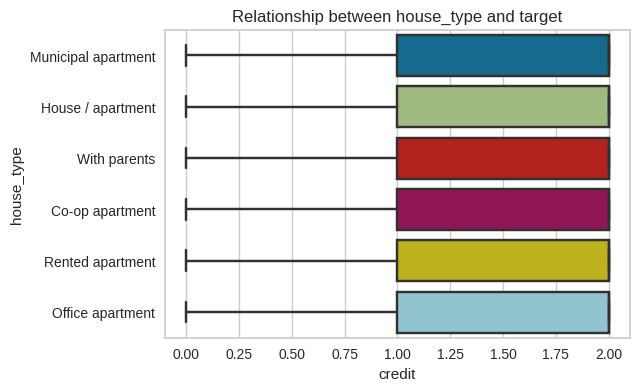

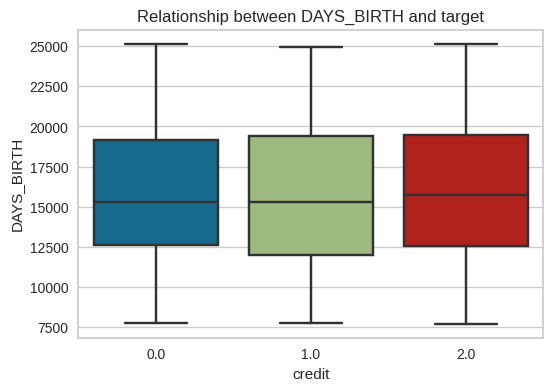

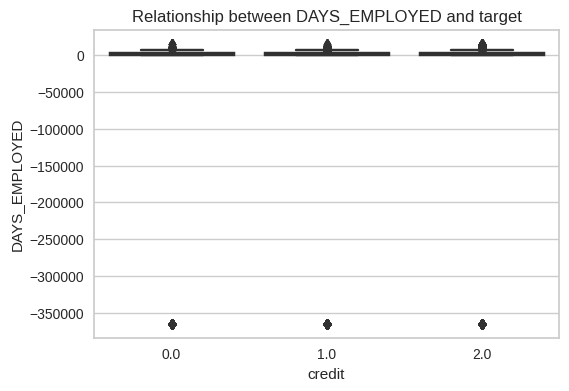

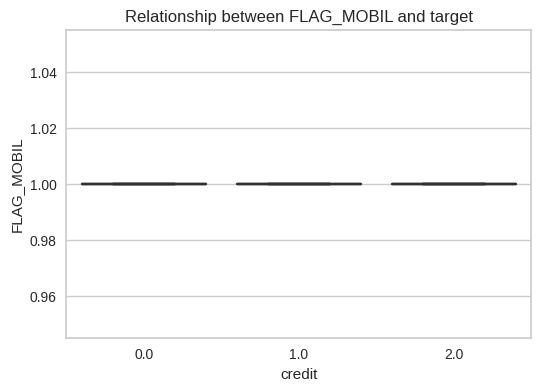

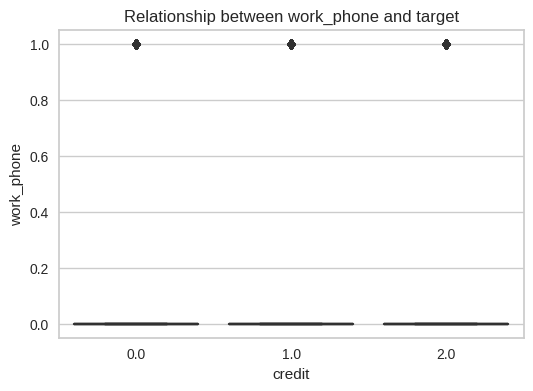

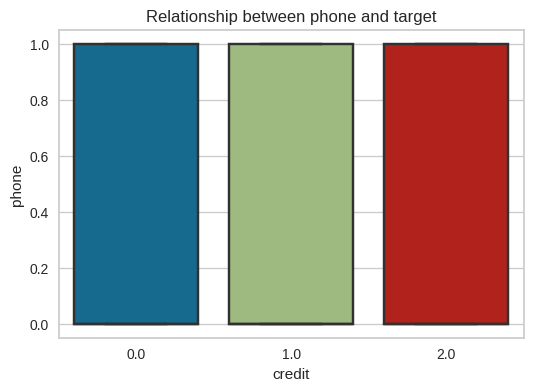

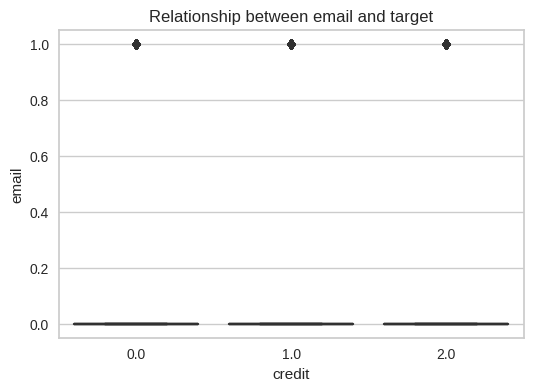

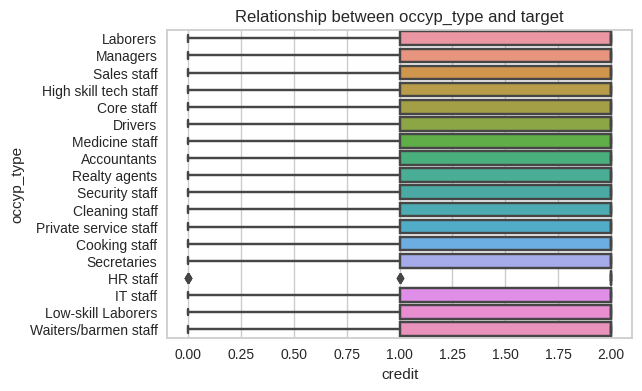

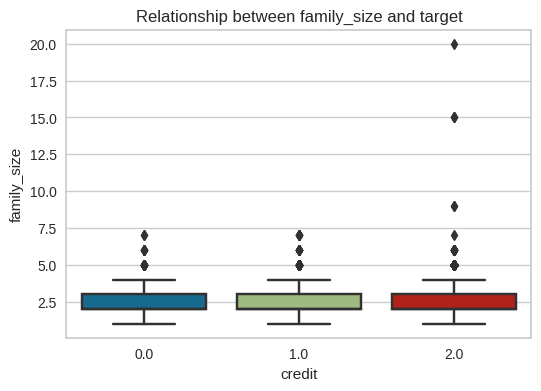

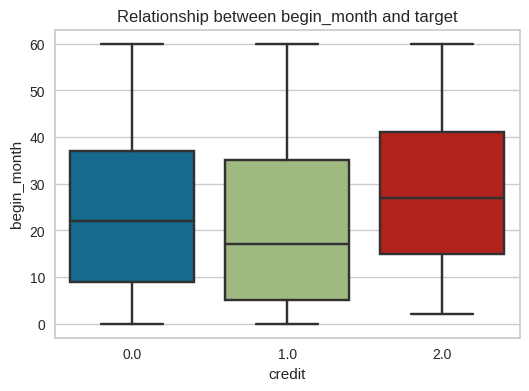

In [ ]:
for column in train.columns:
    if column != 'credit':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='credit', y=column, data=train)
        plt.title(f'Relationship between {column} and target')
        plt.show()

박스 플롯을 통해 각 변수와 타겟 변수인 'credit' 사이의 관계를 시각적으로 살펴보았습니다. 각 플롯에 대한 간단한 해석은 다음과 같습니다.

- **gender**: 성별에 따른 신용도 차이가 크게 나타나지 않습니다.
- **car**: 차 소유 여부에 따른 신용도 차이도 크게 나타나지 않습니다.
- **reality**: 부동산 소유 여부에 따른 신용도 차이도 크게 나타나지 않습니다.
- **child_num**: 자녀 수에 따른 신용도 차이는 뚜렷하지 않습니다. 그러나 일부 고객은 특히 많은 자녀를 가지고 있습니다.
- **income_total**: 소득과 신용도 사이에 뚜렷한 패턴이 보이지 않습니다.
- **DAYS_BIRTH**: 출생일로부터의 날짜와 신용도 사이에 특별한 관계가 보이지 않습니다.
- **DAYS_EMPLOYED**: 고용일로부터의 날짜와 신용도 사이에 뚜렷한 패턴이 보이지 않습니다.
- **family_size**: 가족 규모에 따른 신용도 차이는 뚜렷하지 않습니다.
- **begin_month**: 신용카드 발급일로부터의 월 수와 신용도 사이에 뚜렷한 패턴이 보이지 않습니다.

대부분의 변수들이 신용도와 뚜렷한 관계를 보이지 않는 것처럼 보이나, 몇몇 변수들은 추가적인 전처리나 변환 후에 더 유의미한 정보를 제공할 수 있습니다.

### **2. 파생변수 생성**

**파생변수**는 기존의 데이터로부터 새롭게 생성된 변수를 의미합니다. 원래의 데이터셋에 포함되어 있지 않은 새로운 정보나 관점을 제공하기 위해 기존 변수들을 변형하거나 여러 변수들을 조합하여 만들어진 변수입니다.

파생변수를 만드는 것은 요리사가 주방에 있는 재료들을 조합하여 새로운 요리를 만드는 것과 유사합니다. 각 재료는 자체적으로는 특별한 맛이나 특징을 가질 수 있지만, 여러 재료들을 조합하면 전혀 새로운 맛이나 특징을 가진 요리를 만들어 낼 수 있습니다. 예를 들어 간단한 소금과 후추는 스테이크의 맛을 향상시키는 중요한 요소가 될 수 있습니다.

**파생변수를 생성하는 이유**
1. **정보 향상**: 원 데이터만으로는 보이지 않던 새로운 정보나 관점을 제공하여 데이터의 해석력을 향상시킵니다.
2. **모델 성능 향상**: 새롭게 생성된 파생변수는 기계 학습 모델의 성능을 향상시킬 수 있습니다.
3. **의미있는 해석**: 파생변수는 원 데이터보다 더 직관적이거나 비즈니스 관점에서 더 의미 있는 해석을 제공할 수 있습니다.
4. **데이터 요약**: 큰 데이터셋을 요약하여 분석이나 시각화를 용이하게 만들 수 있습니다.

온라인 쇼핑몰의 데이터에서 '방문 횟수'와 '구매 횟수'라는 두 개의 변수가 있을 때, 이 두 변수를 조합하여 '구매 전환율'이라는 새로운 파생변수를 생성할 수 있습니다. 이 '구매 전환율' 변수는 고객이 웹사이트를 방문할 때 실제로 제품을 구매할 확률을 나타내며, 원래의 변수보다 더 많은 정보를 제공할 수 있습니다.


##### **Inst.**
- **Income_Per_Family_Member**: 'income_total'은 총 소득을 나타내고, 'family_size'는 가족 크기를 나타내므로 이 두 특성을 이용해 가족 당 평균 소득을 계산할 수 있습니다.
- **Child_to_Family_Ratio**: 'child_num'은 자녀 수를 나타내고, 'family_size'는 가족 크기를 나타내므로 이 두 특성을 이용해 가족 중 얼마나 많은 비율이 아이인지를 계산할 수 있습니다.
- **Is_Working**: 'DAYS_EMPLOYED' 특성을 이용하여 고객이 현재 일하는 중인지 여부를 나타내는 이진 변수를 생성할 수 있습니다. 'DAYS_EMPLOYED'가 0 이상이면 고객이 일하지 않고 있다는 것을 의미합니다.

참고로, 'DAYS_BIRTH'와 'DAYS_EMPLOYED'는 일 단위로 저장되어 있으며, 음수 값으로 나타나 있습니다. 나이 계산을 위해 이 값들을 양수로 변환하고, 1년을 365.25일(윤년을 고려)로 계산합니다. 'DAYS_EMPLOYED'의 경우 양수 값은 고용되지 않은 상태를 나타내므로, 이를 고려하여 'Is_Working' 파생 변수를 생성해봅시다.

##### **Hint.**
- **Income_Per_Family_Member**는 가족 당 소득을 의미하며, `income_total`을  `family_size`로 나누어 계산됩니다. 이는 각 가족원이 얼마의 소득을 가지고 있는지를 나타냅니다.
- **Child_to_Family_Ratio**는 가족 중 얼마나 많은 비율이 아이인지를 나타냅니다. `child_num`을 `family_size`로 나누어 얻을 수 있습니다.
- **Is_Working**은 사람이 일하는지 여부를 나타내는 변수입니다. `DAYS_EMPLOYED` 값이 0 이상이면 작업하지 않는 것으로 간주(0으로 표시)하고, 그렇지 않으면 작업 중(1로 표시)으로 간주합니다


`apply`와 `lambda` 함수는 pandas 데이터프레임 또는 시리즈에 사용자 정의 함수나 복잡한 연산을 효율적으로 적용하기 위한 도구입니다.

```python
dataframe_or_series.apply(lambda x: your_function(x))
```

- **dataframe_or_series**:
   - 연산을 적용하고자 하는 pandas의 데이터프레임 또는 시리즈 객체입니다.

- **lambda x**:
   - 임시로 정의된 간단한 함수입니다. `x`는 데이터프레임의 각 행 또는 열, 또는 시리즈의 각 요소를 나타냅니다.
   
- **your_function(x)**:
   - `x`에 대해 적용하고자 하는 연산 또는 함수입니다. 이 부분에 원하는 로직이나 연산을 지정합니다.

- 예시: 다음 코드는 데이터프레임의 'column_name' 컬럼의 각 값이 10보다 큰지 확인하는 연산을 적용한 예시입니다.

```python
dataframe['column_name'].apply(lambda x: True if x > 10 else False)
```


##### **Solution.**
train 데이터셋에 위의 파생 변수들을 추가하고, test 데이터셋에도 동일한 파생 변수들을 추가해봅시다. 이렇게 생성된 파생 변수들을 확인하기 위해 `Income_Per_Family_Member`, `Child_to_Family_Ratio`, `Is_Working` 컬럼들의 첫 5행을 출력해봅시다!

In [ ]:
train['Income_Per_Family_Member'] = train['income_total'] / train['family_size']
train['Child_to_Family_Ratio'] = train['child_num'] / train['family_size']
train['Is_Working'] = train['DAYS_EMPLOYED'].apply(lambda x: 0 if x >= 0 else 1)

train[['Income_Per_Family_Member', 'Child_to_Family_Ratio', 'Is_Working']].head()

,Income_Per_Family_Member,Child_to_Family_Ratio,Is_Working
0,101250.0,0.000000,0
1,82500.0,0.333333,0
2,225000.0,0.000000,0
3,101250.0,0.000000,0
4,78750.0,0.000000,0


In [ ]:
test['Income_Per_Family_Member'] = test['income_total'] / test['family_size']
test['Child_to_Family_Ratio'] = test['child_num'] / test['family_size']
test['Is_Working'] = test['DAYS_EMPLOYED'].apply(lambda x: 0 if x >= 0 else 1)  # 0 for not working, 1 for working

test[['Income_Per_Family_Member', 'Child_to_Family_Ratio', 'Is_Working']].head()

,Income_Per_Family_Member,Child_to_Family_Ratio,Is_Working
0,56250.0,0.0,1
1,67500.0,0.0,0
2,34686.0,0.0,0
3,56250.0,0.0,0
4,112500.0,0.0,0


- Income_Per_Family_Member: 가족 당 평균 소득입니다.
- Child_to_Family_Ratio: 가족 중 아이의 비율입니다.
- Is_Working: 고객이 현재 일하는 중인지 여부를 나타냅니다. 1은 일하는 중이고, 0은 일하지 않는 상태를 의미합니다.

### **3. 데이터 전처리(스케일링, 이상치 처리 등)**

#### 3-1. 결측치 처리


In [ ]:
train.isna().sum()

index                          0
gender                         0
car                            0
reality                        0
child_num                      0
income_total                   0
income_type                    0
edu_type                       0
family_type                    0
house_type                     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_MOBIL                     0
work_phone                     0
phone                          0
email                          0
occyp_type                  8171
family_size                    0
begin_month                    0
credit                         0
Income_Per_Family_Member       0
Child_to_Family_Ratio          0
Is_Working                     0
dtype: int64

occyp_type에서 8,171개의 결측치가 존재하지만 null 값은 무직을 의미할 수 있기 때문에, 하나의 클래스로 간주하고 진행합니다.


In [ ]:
train.fillna('NaN', inplace=True)
test.fillna('NaN', inplace=True)

#### 3-2. 이상치 처리
이상치 처리에서는 이상치를 찾는 방법에 따라 결과가 크게 달라질 수 있습니다. z-점수를 이용한 방법은 강력한 방법이지만, 이 방법은 데이터의 분포가 정규분포를 따르지 않는 경우, 혹은 이상치가 많은 경우에는 적합하지 않을 수 있습니다.

이 경우, **IQR(Interquartile Range, 사분위범위) 방법**을 이용해 이상치를 찾는 것이 적합할 수 있습니다. IQR 방법은 데이터의 1사분위수(Q1)와 3사분위수(Q3)를 이용하며, 일반적으로 Q1 - 1.5IQR 보다 작거나 Q3 + 1.5IQR 보다 큰 값을 이상치로 간주합니다.

아래는 IQR 방법을 이용한 이상치 처리 코드입니다:

In [ ]:
### Exclude 'credit' from the columns to be processed
columns_to_process = [column for column in train.columns if column != 'credit' and train[column].dtype in ['int64', 'float64']]

### Here we will use IQR method for handling outliers
for column in columns_to_process:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    train[column] = np.where(train[column] < min_value, min_value, train[column])
    train[column] = np.where(train[column] > max_value, max_value, train[column])

#### 3-3. 스케일링
데이터 스케일링은 다양한 특성의 값을 일정한 범위나 분포로 변환하는 과정입니다.      
스케일러의 선택은 특성의 분포와 특성에 포함된 이상치의 유무에 따라 달라집니다.

1. **RobustScaler**
    - **선택 기준**: 특성이 매우 왜곡되어 있거나 이상치가 많을 경우 사용됩니다.
    - "로버스트(튼튼한)" 스케일러라고 생각하실 수 있습니다. 상자 안에 여러 종류의 과일이 있을 때, 몇 개의 과일이 너무 크다면 그 큰 과일들이 상자의 평균 크기를 크게 만들게 됩니다. RobustScaler는 이런 큰 과일들을 무시하고 중간 크기의 과일을 기준으로 상자의 크기를 조정합니다.

2. **MinMaxScaler**:
    - **선택 기준**: 모든 특성 값이 양수이며 왜곡이 심하지 않을 경우 사용됩니다.
    - 특성의 최소값과 최대값을 사용하여 값을 0과 1 사이로 변환합니다. 물을 얼려서 얼음과 물을 같은 온도 범위 내로 가져오는 것과 유사합니다.

3. **StandardScaler**:
    - **선택 기준**: 특성이 정규 분포를 따르는 경우 (또는 그렇게 가정하는 경우) 사용됩니다.
    - 평균을 빼고 표준 편차로 나누어 특성을 표준화합니다. 여러 사람들의 몸무게를 비교할 때, 각 사람의 몸무게에서 전체 평균 몸무게를 빼고, 그 결과를 몸무게의 표준 편차로 나누어서 각 사람의 몸무게가 평균에 비해 얼마나 떨어져 있는지를 나타내는 것과 유사합니다.

이렇게 각 스케일러는 데이터의 특성과 분포에 따라 적절하게 선택되어야 합니다. 다음 코드로 적절한 스케일러를 선택해볼까요?

In [ ]:
# 연속형 컬럼 정의
continuous_features = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'Income_Per_Family_Member', 'Child_to_Family_Ratio']

# 각 특성의 특성에 따라 적절한 스케일러 선택
selected_scalers = {}

for feature in continuous_features:
    if train[feature].skew() > 1:  # 특성이 매우 왜곡되어 있을 경우
        selected_scalers[feature] = 'RobustScaler'  # RobustScaler는 이상치에 덜 민감함
    elif train[feature].min() >= 0:  # 특성 값이 모두 양수인 경우
        selected_scalers[feature] = 'MinMaxScaler'  # MinMaxScaler는 원래 분포의 형태를 유지하며 원래 데이터에 포함된 정보를 왜곡하지 않음
    else:  # 특성이 정규 분포일 경우
        selected_scalers[feature] = 'StandardScaler'  # StandardScaler는 평균을 빼고 단위 분산으로 스케일링하여 특성을 표준화함

print(selected_scalers)

{'child_num': 'RobustScaler', 'income_total': 'MinMaxScaler', 'DAYS_BIRTH': 'MinMaxScaler', 'DAYS_EMPLOYED': 'StandardScaler', 'family_size': 'MinMaxScaler', 'begin_month': 'MinMaxScaler', 'Income_Per_Family_Member': 'MinMaxScaler', 'Child_to_Family_Ratio': 'RobustScaler'}



Robust Scaler는 평균과 분산 대신에 중간 값과 사분위 값을 사용하여 스케일링을 진행하기 때문에 이상치에 비교적 덜 민감합니다.    
이상치가 많은 컬럼인 **child_num과 Child_to_Family_Ratio에 Robust Scaler()**를 적용해볼까요?  
train 데이터에는 fit()과 transform()을 모두 수행하지만, test 데이터는 transform()만 수행해야해요!    
##### **Inst.**
1. RobustScaler() 객체 rbs를 생성합니다.
2. **train 데이터셋**에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 **스케일링 학습**을 수행합니다.
3. **train 데이터셋**에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 **스케일링**을 수행합니다.
4. **test 데이터셋**에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 **스케일링**을 수행합니다.

##### **Hint.**
RobustScaler()는 이상치(outliers)가 있는 데이터셋을 스케일링할 때 사용하는 Scikit-learn 라이브러리의 함수입니다.     
RobustScaler는 중앙값(median)과 IQR(interquartile range)를 사용하여 데이터를 스케일링하며, 아웃라이어(outlier)의 영향을 최소화합니다.

fit()은 주어진 데이터셋에 대해 RobustScaler()를 학습시키기 위한 메소드입니다.    fit() 메소드를 호출하여 학습된 RobustScaler() 객체를 반환하며, 이 객체는 이후에 transform() 메소드를 사용하여 스케일링할 데이터셋에 적용됩니다.

fit() 메소드의 입력 파라미터는 다음과 같아요.

- X (array-like): 스케일링할 데이터셋. 2차원 배열 형태로 입력해야 합니다.

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1. RobustScaler() 객체 rbs를 생성합니다.


# 2. train 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 스케일링 학습을 수행합니다.


# 3. train 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 스케일링을 수행합니다.


# 4. test 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 스케일링을 수행합니다.



##### **Solution.**
test_X 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 컬럼을 선택하여, rbs 객체를 사용하여 스케일링을 수행해봅시다!

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1. RobustScaler() 객체 rbs를 생성합니다.
rbs = RobustScaler()

# 2. train 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 스케일링 학습을 수행합니다.
rbs.fit(train[['child_num', 'Child_to_Family_Ratio']])

# 3. train 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 스케일링을 수행합니다.
train_robust = rbs.transform(train[['child_num', 'Child_to_Family_Ratio']])

# 4. test 데이터셋에서 'child_num'와 'Child_to_Family_Ratio' 열(column)을 선택하여, rbs 객체를 사용하여 스케일링을 수행합니다.
test_robust = rbs.transform(test[['child_num', 'Child_to_Family_Ratio']])

In [ ]:
pd.DataFrame(train, columns=['child_num', 'Child_to_Family_Ratio']).describe()

,child_num,Child_to_Family_Ratio
count,26457.000000,26457.000000
mean,0.416997,0.127545
std,0.688465,0.199304
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.333333
max,2.500000,0.833333


In [ ]:
pd.DataFrame(train_robust, columns=['child_num', 'Child_to_Family_Ratio']).describe()

,child_num,Child_to_Family_Ratio
count,26457.000000,26457.000000
mean,0.416997,0.382636
std,0.688465,0.597912
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,2.500000,2.500000


이제 연속형 변수 전체에 대해 스케일링을 진행해봅시다!

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 스케일러를 초기화합니다.
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# 연속형 변수에 스케일링을 진행합니다.
for feature, scaler_name in selected_scalers.items():
    scaler = scalers[scaler_name]
    train[feature] = scaler.fit_transform(train[[feature]])
    test[feature] = scaler.transform(test[[feature]])

selected_scalers

({'child_num': 'RobustScaler',
  'income_total': 'MinMaxScaler',
  'DAYS_BIRTH': 'MinMaxScaler',
  'DAYS_EMPLOYED': 'StandardScaler',
  'family_size': 'MinMaxScaler',
  'begin_month': 'MinMaxScaler',
  'Income_Per_Family_Member': 'MinMaxScaler',
  'Child_to_Family_Ratio': 'RobustScaler'},
 {})

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,Income_Per_Family_Member,Child_to_Family_Ratio,Is_Working
count,26457.000000,26457.000000,26457.000000,26457.000000,2.645700e+04,26457.0,26457.0,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.0
mean,13228.000000,0.416997,0.438805,0.473036,7.519823e-18,1.0,0.0,0.294251,0.0,0.338825,0.435388,1.519560,0.403726,0.382636,0.0
std,7637.622372,0.688465,0.230389,0.240820,1.000019e+00,0.0,0.0,0.455714,0.0,0.248756,0.275992,0.702283,0.252099,0.597912,0.0
min,0.000000,0.000000,0.000000,0.000000,-1.755650e+00,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,6614.000000,0.000000,0.267516,0.271737,-3.612385e-01,1.0,0.0,0.000000,0.0,0.285714,0.200000,1.000000,0.225000,0.000000,0.0
50%,13228.000000,0.000000,0.369427,0.449476,2.197916e-02,1.0,0.0,0.000000,0.0,0.285714,0.400000,2.000000,0.325000,0.000000,0.0
75%,19842.000000,1.000000,0.560510,0.672093,5.683689e-01,1.0,0.0,1.000000,0.0,0.571429,0.650000,2.000000,0.535000,1.000000,0.0
max,26456.000000,2.500000,1.000000,1.000000,1.962780e+00,1.0,0.0,1.000000,0.0,1.000000,1.000000,2.000000,1.000000,2.500000,0.0



변수 스케일링까지 잘 이루어졌군요! Stage 4는 여기까지입니다!    
<img src='http://drive.google.com/uc?export=view&id=1-n-mw8t-LdKqrqfazDfSAc9dKH7Lcbzl' /><br>
벌써 여정의 절반이 지나갔네요⛳ 남은 스테이지도 파이팅입니다~
